In [1]:
import pandas as pd
import numpy as np
import warnings
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc, roc_auc_score, accuracy_score, balanced_accuracy_score,f1_score,recall_score,precision_score,classification_report, confusion_matrix
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
import matplotlib.pyplot as plt


%matplotlib inline

In [2]:
df_online = pd.read_csv('df_online.csv', index_col = 0)

In [3]:
df_online.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.200000,0.200000,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.000000,0.100000,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.050000,0.140000,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0.0,0.0,0.0,0.0,10.0,627.500000,0.020000,0.050000,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
5,0.0,0.0,0.0,0.0,19.0,154.216667,0.015789,0.024561,0.0,0.0,Feb,2,2,1,3,Returning_Visitor,False,False


##### Agar memudahkan dalam memproses data saya akan membinning beberapa data dalam feature seperti SpesialDay, Month, OperatingSystem, Browser, Region, TrafficType

#### Month - Binning Feature

Disini saya akan menggabungkan beberapa bulan menjadi rest agar lebih mudah untuk proses, pengelompokan saya lakukan berdasarkan bulan yang memiliki nilai yang rendah

In [4]:
df_online.Month = df_online.Month.replace(['Aug','Feb',' Jul','June','Oct', 'Sep'], 'Rest')

In [5]:
df_online.Month.unique()

array(['Rest', 'Mar', 'May', 'Jul', 'Nov', 'Dec'], dtype=object)

In [6]:
df_online['Month'] = df_online['Month'].map({'Mar':3,'May':5,'Jul':7,'Nov':11,'Dec':12, 'Rest':0})

In [7]:
df_online.Month.unique()

array([ 0,  3,  5,  7, 11, 12], dtype=int64)

#### TrafficType - Binning Feature

In [8]:
df_online.TrafficType.unique()

array([ 1,  2,  4,  3,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 18, 19,
       16, 17, 20], dtype=int64)

In [9]:
df_online.TrafficType = df_online.TrafficType.replace([5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20], 5)

In [10]:
df_online.TrafficType.unique()

array([1, 2, 4, 3, 5], dtype=int64)

#### Region - Feature Binning

In [11]:
df_online.Region = df_online.Region.replace([5,6,7,8,9], 5)

In [12]:
df_online.Region.unique()

array([1, 2, 3, 4, 5], dtype=int64)

#### Browser - Feature Binning

In [13]:
df_online.Browser.unique()

array([ 1,  2,  3,  4,  5,  6,  7, 10,  8,  9, 12, 13, 11], dtype=int64)

In [14]:
df_online.Browser = df_online.Browser.replace([3,4,5,6,7,8,9,10,11,12,13], 3)

In [15]:
df_online.Browser.unique()

array([1, 2, 3], dtype=int64)

#### OperatingSystems - Feature Binning

In [16]:
df_online.OperatingSystems.unique()

array([1, 2, 3, 4, 7, 6, 8, 5], dtype=int64)

In [17]:
df_online.OperatingSystems = df_online.OperatingSystems.replace([4,5,6,7,8], 4)

In [18]:
df_online.OperatingSystems.unique()

array([1, 2, 3, 4], dtype=int64)

#### SpecialDay - Feature Binning

In [19]:
df_online.SpecialDay.unique()

array([0. , 0.8, 0.4, 1. , 0.2, 0.6])

In [20]:
df_online.SpecialDay = df_online.SpecialDay.replace(to_replace = [0.2,0.4,0.6,0.8,1.0], value = 1.0)

In [21]:
df_online.SpecialDay.unique()

array([0., 1.])

#### Weekend and Revenue encoding

In [22]:
df_online.Weekend = df_online.Weekend.replace({True: 1, False: 0})
df_online.Revenue = df_online.Revenue.replace({True: 1, False: 0})

In [23]:
print(df_online.Weekend.unique())
print(df_online.Revenue.unique())

[0 1]
[0 1]


In [24]:
dummies= pd.get_dummies(df_online['VisitorType'],drop_first=True) 
df_online=pd.concat([df_online.drop('VisitorType', axis=1), dummies],axis=1) 
df_online=df_online.drop('Other',axis=1)

In [25]:
df_online.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,Weekend,Revenue,Returning_Visitor
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.200000,0.200000,0.0,0.0,0,1,1,1,1,0,0,1
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.000000,0.100000,0.0,0.0,0,2,2,1,2,0,0,1
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.050000,0.140000,0.0,0.0,0,3,2,2,4,0,0,1
4,0.0,0.0,0.0,0.0,10.0,627.500000,0.020000,0.050000,0.0,0.0,0,3,3,1,4,1,0,1
5,0.0,0.0,0.0,0.0,19.0,154.216667,0.015789,0.024561,0.0,0.0,0,2,2,1,3,0,0,1


In [26]:
df_online.corr()['Revenue'].sort_values()

ExitRates                 -0.206145
BounceRates               -0.149348
Returning_Visitor         -0.103240
SpecialDay                -0.086935
OperatingSystems          -0.022363
Region                    -0.015092
TrafficType                0.002788
Browser                    0.015494
Weekend                    0.028937
Informational_Duration     0.069984
Month                      0.080334
Administrative_Duration    0.092911
Informational              0.094672
Administrative             0.137970
ProductRelated_Duration    0.151528
ProductRelated             0.157624
PageValues                 0.492317
Revenue                    1.000000
Name: Revenue, dtype: float64

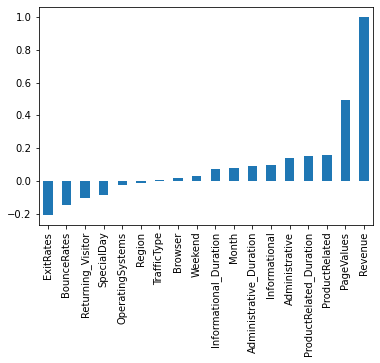

In [27]:
df_online.corr()['Revenue'].sort_values().plot(kind='bar')

#### Drop Target

In [28]:
X= df_online.drop(columns = 'Revenue',axis=1)
y=df_online['Revenue']

#### Scalling

Robust Scaler merupakan algoritma scaling yang tidak sensitif terhadap outlier dan memiliki performa yang umumnya paling baik dari algoritma scaling yang lain oleh karena itu algoritma ini dipilih sebagai media scaling

In [29]:
scaler = RobustScaler()
X = scaler.fit_transform(X)

#### Train Test Split

In [30]:
X_train,X_test, y_train, y_test = train_test_split(X,y, stratify = y, test_size = .2, random_state = 42)

In [31]:
X_train.shape

(9826, 17)

In [32]:
X_test.shape

(2457, 17)

#### Logistic Regression dengan Outlier

In [33]:
modelLR1 = LogisticRegression(max_iter=1000)
model = modelLR1.fit(X_train, y_train)

In [34]:
model.score(X_test, y_test)

0.8868538868538869

In [35]:
y_pred = modelLR1.predict(X_test)

In [36]:
y_predict1 = modelLR1.predict(X_train)

In [37]:
print(classification_report(y_train,y_predict1))

              precision    recall  f1-score   support

           0       0.89      0.98      0.93      8300
           1       0.74      0.36      0.49      1526

    accuracy                           0.88      9826
   macro avg       0.82      0.67      0.71      9826
weighted avg       0.87      0.88      0.86      9826



In [38]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.98      0.94      2075
           1       0.79      0.37      0.51       382

    accuracy                           0.89      2457
   macro avg       0.84      0.68      0.72      2457
weighted avg       0.88      0.89      0.87      2457



#### Handling Outlier

In [39]:
numerical_features=['BounceRates','ExitRates','Administrative_Duration','ProductRelated_Duration']
for cols in numerical_features:
    Q1 = df_online[cols].quantile(0.25)
    Q3 = df_online[cols].quantile(0.75)
    IQR = Q3 - Q1     

    filter = (df_online[cols] >= Q1 - 1.5 * IQR) & (df_online[cols] <= Q3 + 1.5 *IQR)
    df_online=df_online.loc[filter]

In [40]:
X= df_online.drop(columns = 'Revenue',axis=1)
y=df_online['Revenue']

In [41]:
scaler = RobustScaler()
X = scaler.fit_transform(X)

In [42]:
X_train,X_test, y_train, y_test = train_test_split(X,y, stratify = y, test_size = .2, random_state = 42)

#### Logistic Regression tanpa Outlier

In [43]:
modelLR2 = LogisticRegression(max_iter=1000)
model12 = modelLR2.fit(X_train, y_train)

In [44]:
model12.score(X_test, y_test)

0.8891428571428571

In [45]:
y_pred1= modelLR2.predict(X_test)

In [46]:
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94      1461
           1       0.79      0.45      0.57       289

    accuracy                           0.89      1750
   macro avg       0.85      0.71      0.75      1750
weighted avg       0.88      0.89      0.88      1750



Dari sini kita dapat melihat outlier dalam data ini memiliki efek yang kecil terhadap hasil olah data dari Logistic Regression, tetapi untuk hasil yang lebih baik dan mengurangi resiko yang mungkin akan terjadi seperti outlier dapat menyebabkan kesalahan dalam pengambilan keputusan dan kesimpulan. Maka saya memutuskan untuk menggunakan data tanpa outlier

#### Logistic Regression dengan Handling Imbalance Data

In [47]:
df_online['Revenue'].value_counts()

0    7302
1    1445
Name: Revenue, dtype: int64

Terdapat 4 cara untuk menghandle imbalanced data pada kasus ini yaitu oversampling, undersampling, SMOTE, dan class weight.
SMOTE dipilih karena metode ini cepat dalam prosesnya

In [48]:
sm = SMOTE(random_state=42)

In [49]:
X_train_sm,y_train_sm=sm.fit_sample(X_train,y_train)

In [50]:
X_train_sm.shape

(11682, 17)

In [59]:
y_train_sm.shape

(11682,)

In [57]:
y_train.shape

(6997,)

In [51]:
X_train.shape

(6997, 17)

In [52]:
logres = LogisticRegression(max_iter=1000)
model1 = logres.fit(X_train_sm,y_train_sm)

In [53]:
model1.score(X_test,y_test)

0.876

In [54]:
prediksi1 = logres.predict(X_test)

In [55]:
print(classification_report(y_test, prediksi1))

              precision    recall  f1-score   support

           0       0.94      0.91      0.92      1461
           1       0.61      0.69      0.65       289

    accuracy                           0.88      1750
   macro avg       0.77      0.80      0.79      1750
weighted avg       0.88      0.88      0.88      1750



Dengan menggunakan SMOTE nilai akurasi yang didapat memang sedikit berkurang tetapi perubahannya sangat kecil dan nilai yang sangat berubah dapat kita lihat ada pada presicion yang mengalami penurunan menjadi 0.61 yang nilai awalnya adalah 0.79. Walaupun begitu tanpa handling imbalance data score yang didapat lebih tinggi tetapi saat predict nilai tersebut bias atau lebih condong ke arah 0 karena perbandingan jumlah data 85% dengan 15%

In [62]:
df_online.to_csv('df_online1.csv')